In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
DATA=pd.read_excel(r"C:\Users\retou\TRABAJO DE GRADO MIX\Tablas_de_Modelos_Speed_sound_con_parS.xlsx",
                   sheet_name="Models_speed_sound_results")
DATA.head()

,MIX,u_exp,U_ECR,U_VTPR_NRTL,CP_VTPR,CV_VTPR,BT_VTPR
0,MIX_C1CH,1259.485,1259.279153,1209.241374,3.199912,1.827833,0.000002
1,MIX_C1CH,1247.140,1247.109288,1198.873790,3.207787,1.816358,0.000002
2,MIX_C1CH,1234.970,1234.977287,1188.641946,3.216082,1.804965,0.000002
3,MIX_C1CH,1222.700,1222.890163,1178.558653,3.224803,1.793653,0.000002
4,MIX_C1CH,1210.695,1210.854517,1168.603581,3.233959,1.782419,0.000002


In [3]:
Temps=np.linspace(298.15,338.15,17)
Temps

array([298.15, 300.65, 303.15, 305.65, 308.15, 310.65, 313.15, 315.65,
       318.15, 320.65, 323.15, 325.65, 328.15, 330.65, 333.15, 335.65,
       338.15])

In [4]:
D_EXPS=DATA.groupby('MIX')['u_exp'].agg(list).reset_index()
D_EXPS

,MIX,u_exp
0,MIX_C1B,"[1306.47, 1294.69, 1283.08, 1271.365, 1259.88,..."
1,MIX_C1CH,"[1259.485, 1247.14, 1234.97, 1222.7, 1210.695,..."
2,MIX_C1O,"[1177.98, 1167.63, 1157.315, 1147.035, 1136.82..."
3,MIX_C1T,"[1310.93, 1300.115, 1289.33, 1278.615, 1267.94..."
4,MIX_C2B,"[1308.59, 1296.83, 1285.25, 1273.74, 1262.29, ..."
5,MIX_C2CH,"[1261.22, 1249.0, 1236.87, 1224.8, 1212.84, 12..."
6,MIX_C2O,"[1180.13, 1169.67, 1159.36, 1149.1, 1138.89, 1..."
7,MIX_C2T,"[1313.24, 1302.46, 1291.72, 1281.04, 1270.39, ..."
8,MIX_C3B,"[1310.815, 1299.255, 1287.73, 1276.275, 1264.8..."
9,MIX_C3CH,"[1263.29, 1251.135, 1238.905, 1226.91, 1214.99..."


In [6]:
D_NRTL=DATA.groupby('MIX')['U_ECR'].agg(list).reset_index()
D_RK=DATA.groupby('MIX')['U_VTPR_NRTL'].agg(list).reset_index()

In [9]:
RES_NRTL=[np.array(D_EXPS.iloc[:,1][k])-np.array(D_NRTL.iloc[:,1][k]) for k in range(0,len(D_EXPS))]
RES_RK=[np.array(D_EXPS.iloc[:,1][k])-np.array(D_RK.iloc[:,1][k]) for k in range(0,len(D_EXPS))]
RES_DF=pd.DataFrame({"MIX":D_EXPS["MIX"].values,"RESU_ECR":RES_NRTL,"RESU_VTPR_NRTL":RES_RK})
#RES_DF.iloc[:,1][0]
RES_DF

,MIX,RESU_ECR,RESU_VTPR_NRTL
0,MIX_C1B,"[0.2683319570501226, 0.04447764960400491, -0.0...","[-79.20890785009692, -79.78057770052101, -80.3..."
1,MIX_C1CH,"[0.20584734494491386, 0.030711674969097658, -0...","[50.24362553911783, 48.26620957741602, 46.3280..."
2,MIX_C1O,"[0.15104967441197914, 0.031885875162060984, -0...","[-41.70519333805191, -40.96900769593685, -40.3..."
3,MIX_C1T,"[0.12239021723303267, 0.030651060699028676, -0...","[-62.11309188873088, -61.753864040450026, -61...."
4,MIX_C2B,"[0.1764861312449284, -0.027020449281053516, -0...","[-80.04536834081705, -80.58274604868711, -81.0..."
5,MIX_C2CH,"[0.19270113836091696, 0.0376373721969685, -0.0...","[46.658956734974936, 44.665392840671075, 42.65..."
6,MIX_C2O,"[0.21430091736215218, -0.008138499514871, -0.0...","[-42.28739087736085, -41.666361587360825, -41...."
7,MIX_C2T,"[0.13821921286012184, 0.03906086326514924, -0....","[-63.63335921890507, -63.213050432003, -62.880..."
8,MIX_C3B,"[3.2618884817670732, 1.8404781304082007, 0.659...","[-82.05799136592691, -82.39066161533287, -82.8..."
9,MIX_C3CH,"[0.19326616360990556, 0.10514026815894795, -0....","[42.72196825619699, 40.84956487131603, 38.7874..."


In [10]:
New_df=pd.DataFrame()
New_df["ECR"]=RES_DF.iloc[0:1,:].explode("RESU_ECR")["RESU_ECR"]
New_df["VTPR-NRTL"]=RES_DF.iloc[0:1,:].explode("RESU_VTPR_NRTL")["RESU_VTPR_NRTL"]
New_df["T"]=Temps
New_df=New_df.reset_index(drop=True)
New_df=New_df.melt(id_vars='T')
#New_df.groupby('variable')['value'].agg(list).reset_index()
New_df

,T,variable,value
0,298.15,ECR,0.268332
1,300.65,ECR,0.044478
2,303.15,ECR,-0.025034
3,305.65,ECR,-0.221732
4,308.15,ECR,-0.216834
5,310.65,ECR,-0.216249
6,313.15,ECR,-0.11558
7,315.65,ECR,0.02487
8,318.15,ECR,0.105097
9,320.65,ECR,0.140385


In [11]:
TITULOS=["Benceno-DBT (0.1620 m)","Ciclohexano-DBT (0.1503 m)","Octano-DBT (0.1108 m)","Tolueno-DBT (0.1373 m)",
"Benceno-DBT (0.2452 m)","Ciclohexano-DBT (0.2277 m)","Octano-DBT (0.1678 m)","Tolueno-DBT (0.2080 m)",
"Benceno-DBT (0.3284 m)","Ciclohexano-DBT (0.3044 m)","Octano-DBT (0.2247 m)","Tolueno-DBT (0.2785 m)"]

Guardar=["RES_V_B_DBT_C1.svg","RES_V_CH_DBT_C1.svg","RES_V_O_DBT_C1.svg","RES_V_T_DBT_C1.svg",
        "RES_V_B_DBT_C2.svg","RES_V_CH_DBT_C2.svg","RES_V_O_DBT_C2.svg","RES_V_T_DBT_C2.svg",
        "RES_V_B_DBT_C3.svg","RES_V_CH_DBT_C3.svg","RES_V_O_DBT_C3.svg","RES_V_T_DBT_C3.svg",]


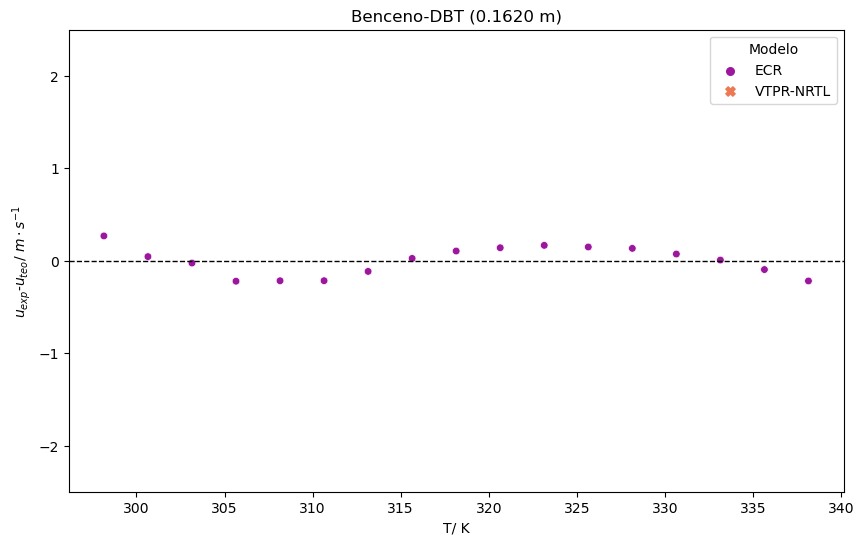

In [28]:
# Crear el scatterplot
plt.figure(figsize=(10, 6))

sns.scatterplot(data=New_df,x="T", y='value', hue='variable', style="variable", palette='plasma', 
                size="variable",sizes=(45, 30), legend="full")
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
#plt.ylim(-100,50)
plt.ylim(-2.5,2.5)
plt.legend(title='Modelo')
plt.title(TITULOS[0])
plt.xlabel("T/ K")
plt.ylabel(r"$u_{exp}$-$u_{teo}$/ $m\cdot s^{-1}$")
plt.savefig(Guardar[0])
plt.savefig(Guardar[0])
# Mostrar el gráfico
plt.show()

In [176]:
New_df=pd.DataFrame()
New_df["NRTL"]=RES_DF.iloc[1:2,:].explode("RES_NRTL")["RES_NRTL"]
New_df["Redlich-Kister"]=RES_DF.iloc[1:2,:].explode("RES_RK")["RES_RK"]
New_df["TRIDEN"]=RES_DF.iloc[1:2,:].explode("RES_TR")["RES_TR"]
New_df["VTPR"]=RES_DF.iloc[1:2,:].explode("RES_VTPR")["RES_VTPR"]
New_df["T"]=Temps
New_df=New_df.reset_index(drop=True)
New_df=New_df.melt(id_vars='T')
#New_df.groupby('variable')['value'].agg(list).reset_index()
New_df

,T,variable,value
0,298.15,NRTL,0.00071
1,300.65,NRTL,0.000442
2,303.15,NRTL,0.000204
3,305.65,NRTL,0.000009
4,308.15,NRTL,-0.000156
...,...,...,...
63,328.15,VTPR,-0.0008
64,330.65,VTPR,-0.00084
65,333.15,VTPR,-0.000862
66,335.65,VTPR,-0.000865


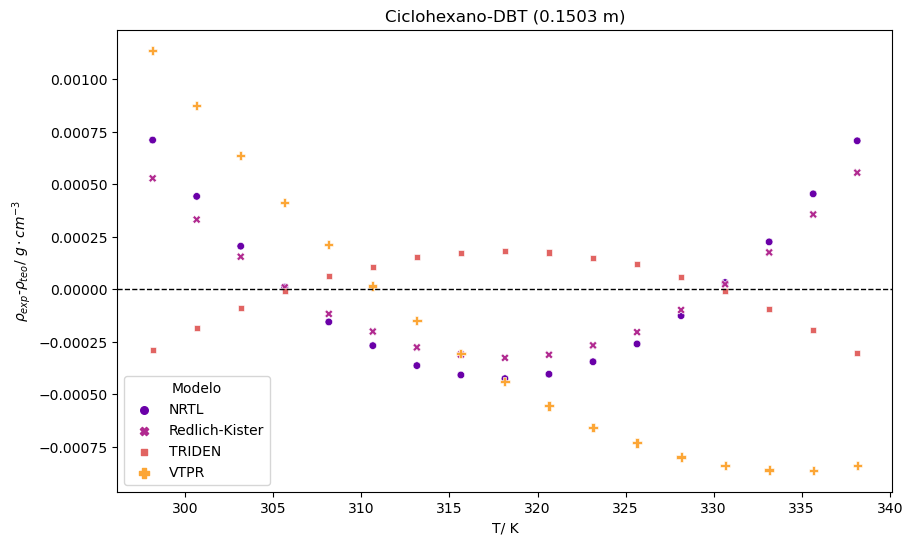

In [177]:
# Crear el scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=New_df,x="T", y='value', hue='variable', style="variable", palette='plasma', 
                size="variable",sizes=(45, 30), legend="full")

plt.axhline(y=0, color='black', linestyle='--', linewidth=1)

plt.legend(title='Modelo')
plt.title(TITULOS[1])
plt.xlabel("T/ K")
plt.ylabel(r"$\rho_{exp}$-$\rho_{teo}$/ $g\cdot cm^{-3}$")
plt.savefig(Guardar[1])
plt.savefig(Guardar[1])
# Mostrar el gráfico
plt.show()

In [178]:
New_df=pd.DataFrame()
New_df["NRTL"]=RES_DF.iloc[2:3,:].explode("RES_NRTL")["RES_NRTL"]
New_df["Redlich-Kister"]=RES_DF.iloc[2:3,:].explode("RES_RK")["RES_RK"]
New_df["TRIDEN"]=RES_DF.iloc[2:3,:].explode("RES_TR")["RES_TR"]
New_df["VTPR"]=RES_DF.iloc[2:3,:].explode("RES_VTPR")["RES_VTPR"]
New_df["T"]=Temps
New_df=New_df.reset_index(drop=True)
New_df=New_df.melt(id_vars='T')
#New_df.groupby('variable')['value'].agg(list).reset_index()
New_df

,T,variable,value
0,298.15,NRTL,0.000035
1,300.65,NRTL,0.000012
2,303.15,NRTL,-0.000002
3,305.65,NRTL,-0.000006
4,308.15,NRTL,-0.000016
...,...,...,...
63,328.15,VTPR,-0.00095
64,330.65,VTPR,-0.001311
65,333.15,VTPR,-0.001658
66,335.65,VTPR,-0.001994


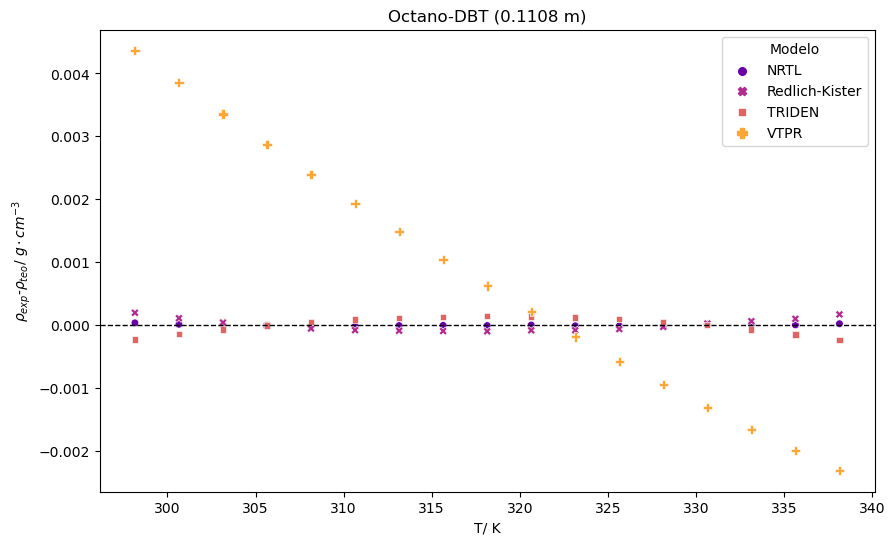

In [179]:
# Crear el scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=New_df,x="T", y='value', hue='variable', style="variable", palette='plasma', 
                size="variable",sizes=(45, 30), legend="full")

plt.axhline(y=0, color='black', linestyle='--', linewidth=1)

plt.legend(title='Modelo')
plt.title(TITULOS[2])
plt.xlabel("T/ K")
plt.ylabel(r"$\rho_{exp}$-$\rho_{teo}$/ $g\cdot cm^{-3}$")
plt.savefig(Guardar[2])
plt.savefig(Guardar[2])
# Mostrar el gráfico
plt.show()

In [180]:
New_df=pd.DataFrame()
New_df["NRTL"]=RES_DF.iloc[3:4,:].explode("RES_NRTL")["RES_NRTL"]
New_df["Redlich-Kister"]=RES_DF.iloc[3:4,:].explode("RES_RK")["RES_RK"]
New_df["TRIDEN"]=RES_DF.iloc[3:4,:].explode("RES_TR")["RES_TR"]
New_df["VTPR"]=RES_DF.iloc[3:4,:].explode("RES_VTPR")["RES_VTPR"]
New_df["T"]=Temps
New_df=New_df.reset_index(drop=True)
New_df=New_df.melt(id_vars='T')
#New_df.groupby('variable')['value'].agg(list).reset_index()
New_df

,T,variable,value
0,298.15,NRTL,-0.00002
1,300.65,NRTL,-0.000009
2,303.15,NRTL,0.000007
3,305.65,NRTL,0.000019
4,308.15,NRTL,0.000013
...,...,...,...
63,328.15,VTPR,-0.002547
64,330.65,VTPR,-0.002929
65,333.15,VTPR,-0.003301
66,335.65,VTPR,-0.003653


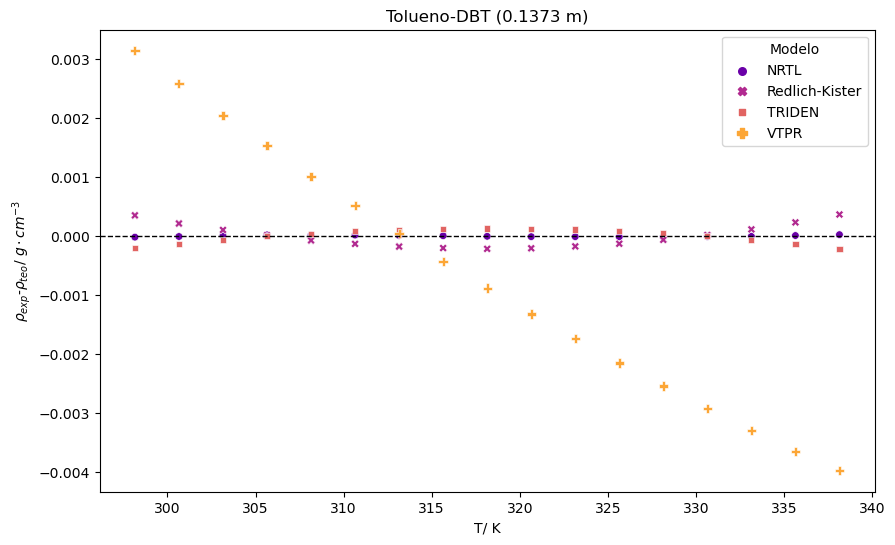

In [181]:
# Crear el scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=New_df,x="T", y='value', hue='variable', style="variable", palette='plasma', 
                size="variable",sizes=(45, 30), legend="full")

plt.axhline(y=0, color='black', linestyle='--', linewidth=1)

plt.legend(title='Modelo')
plt.title(TITULOS[3])
plt.xlabel("T/ K")
plt.ylabel(r"$\rho_{exp}$-$\rho_{teo}$/ $g\cdot cm^{-3}$")
plt.savefig(Guardar[3])
plt.savefig(Guardar[3])
# Mostrar el gráfico
plt.show()

In [182]:
New_df=pd.DataFrame()
New_df["NRTL"]=RES_DF.iloc[4:5,:].explode("RES_NRTL")["RES_NRTL"]
New_df["Redlich-Kister"]=RES_DF.iloc[4:5,:].explode("RES_RK")["RES_RK"]
New_df["TRIDEN"]=RES_DF.iloc[4:5,:].explode("RES_TR")["RES_TR"]
New_df["VTPR"]=RES_DF.iloc[4:5,:].explode("RES_VTPR")["RES_VTPR"]
New_df["T"]=Temps
New_df=New_df.reset_index(drop=True)
New_df=New_df.melt(id_vars='T')
#New_df.groupby('variable')['value'].agg(list).reset_index()
New_df

,T,variable,value
0,298.15,NRTL,0.000232
1,300.65,NRTL,0.000156
2,303.15,NRTL,0.00008
3,305.65,NRTL,0.000006
4,308.15,NRTL,-0.000046
...,...,...,...
63,328.15,VTPR,-0.002198
64,330.65,VTPR,-0.002629
65,333.15,VTPR,-0.003049
66,335.65,VTPR,-0.003447


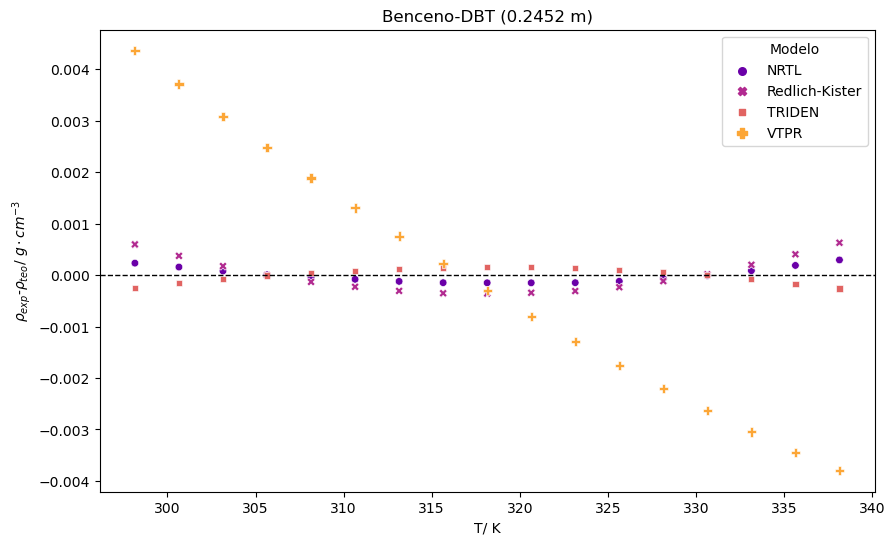

In [183]:
# Crear el scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=New_df,x="T", y='value', hue='variable', style="variable", palette='plasma', 
                size="variable",sizes=(45, 30), legend="full")

plt.axhline(y=0, color='black', linestyle='--', linewidth=1)

plt.legend(title='Modelo')
plt.title(TITULOS[4])
plt.xlabel("T/ K")
plt.ylabel(r"$\rho_{exp}$-$\rho_{teo}$/ $g\cdot cm^{-3}$")
plt.savefig(Guardar[4])
plt.savefig(Guardar[4])
# Mostrar el gráfico
plt.show()

In [184]:
New_df=pd.DataFrame()
New_df["NRTL"]=RES_DF.iloc[5:6,:].explode("RES_NRTL")["RES_NRTL"]
New_df["Redlich-Kister"]=RES_DF.iloc[5:6,:].explode("RES_RK")["RES_RK"]
New_df["TRIDEN"]=RES_DF.iloc[5:6,:].explode("RES_TR")["RES_TR"]
New_df["VTPR"]=RES_DF.iloc[5:6,:].explode("RES_VTPR")["RES_VTPR"]
New_df["T"]=Temps
New_df=New_df.reset_index(drop=True)
New_df=New_df.melt(id_vars='T')
#New_df.groupby('variable')['value'].agg(list).reset_index()
New_df

,T,variable,value
0,298.15,NRTL,0.000185
1,300.65,NRTL,0.000125
2,303.15,NRTL,0.000062
3,305.65,NRTL,0.00001
4,308.15,NRTL,-0.000033
...,...,...,...
63,328.15,VTPR,-0.000755
64,330.65,VTPR,-0.00082
65,333.15,VTPR,-0.000867
66,335.65,VTPR,-0.000896


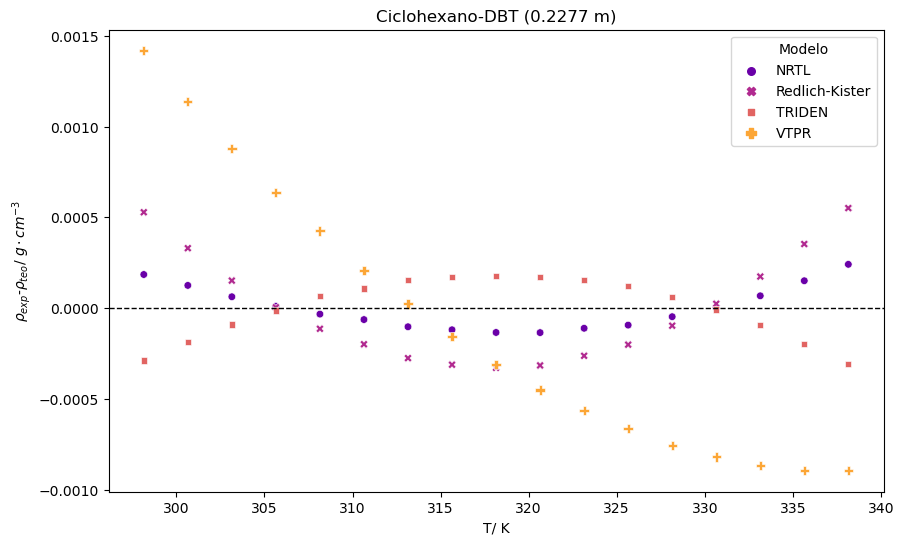

In [185]:
# Crear el scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=New_df,x="T", y='value', hue='variable', style="variable", palette='plasma', 
                size="variable",sizes=(45, 30), legend="full")

plt.axhline(y=0, color='black', linestyle='--', linewidth=1)

plt.legend(title='Modelo')
plt.title(TITULOS[5])
plt.xlabel("T/ K")
plt.ylabel(r"$\rho_{exp}$-$\rho_{teo}$/ $g\cdot cm^{-3}$")
plt.savefig(Guardar[5])
plt.savefig(Guardar[5])
# Mostrar el gráfico
plt.show()

In [186]:
New_df=pd.DataFrame()
New_df["NRTL"]=RES_DF.iloc[6:7,:].explode("RES_NRTL")["RES_NRTL"]
New_df["Redlich-Kister"]=RES_DF.iloc[6:7,:].explode("RES_RK")["RES_RK"]
New_df["TRIDEN"]=RES_DF.iloc[6:7,:].explode("RES_TR")["RES_TR"]
New_df["VTPR"]=RES_DF.iloc[6:7,:].explode("RES_VTPR")["RES_VTPR"]
New_df["T"]=Temps
New_df=New_df.reset_index(drop=True)
New_df=New_df.melt(id_vars='T')
#New_df.groupby('variable')['value'].agg(list).reset_index()
New_df

,T,variable,value
0,298.15,NRTL,0.000028
1,300.65,NRTL,0.000006
2,303.15,NRTL,-0.000005
3,305.65,NRTL,-0.000006
4,308.15,NRTL,-0.000016
...,...,...,...
63,328.15,VTPR,-0.002397
64,330.65,VTPR,-0.002769
65,333.15,VTPR,-0.003108
66,335.65,VTPR,-0.003445


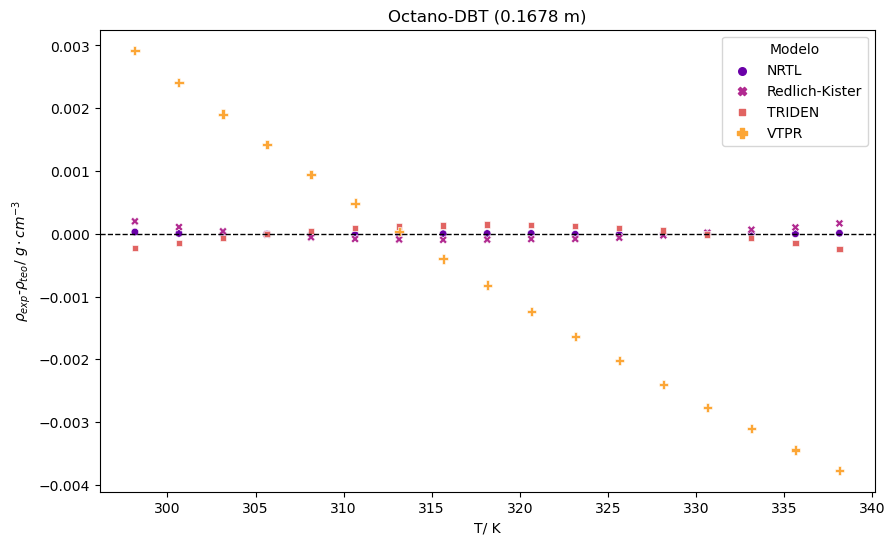

In [187]:
# Crear el scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=New_df,x="T", y='value', hue='variable', style="variable", palette='plasma', 
                size="variable",sizes=(45, 30), legend="full")

plt.axhline(y=0, color='black', linestyle='--', linewidth=1)

plt.legend(title='Modelo')
plt.title(TITULOS[6])
plt.xlabel("T/ K")
plt.ylabel(r"$\rho_{exp}$-$\rho_{teo}$/ $g\cdot cm^{-3}$")
plt.savefig(Guardar[6])
plt.savefig(Guardar[6])
# Mostrar el gráfico
plt.show()

In [188]:
New_df=pd.DataFrame()
New_df["NRTL"]=RES_DF.iloc[7:8,:].explode("RES_NRTL")["RES_NRTL"]
New_df["Redlich-Kister"]=RES_DF.iloc[7:8,:].explode("RES_RK")["RES_RK"]
New_df["TRIDEN"]=RES_DF.iloc[7:8,:].explode("RES_TR")["RES_TR"]
New_df["VTPR"]=RES_DF.iloc[7:8,:].explode("RES_VTPR")["RES_VTPR"]
New_df["T"]=Temps
New_df=New_df.reset_index(drop=True)
New_df=New_df.melt(id_vars='T')
#New_df.groupby('variable')['value'].agg(list).reset_index()
New_df

,T,variable,value
0,298.15,NRTL,0.000008
1,300.65,NRTL,0.000016
2,303.15,NRTL,0.000016
3,305.65,NRTL,0.000013
4,308.15,NRTL,0.000008
...,...,...,...
63,328.15,VTPR,-0.002483
64,330.65,VTPR,-0.002869
65,333.15,VTPR,-0.003242
66,335.65,VTPR,-0.0036


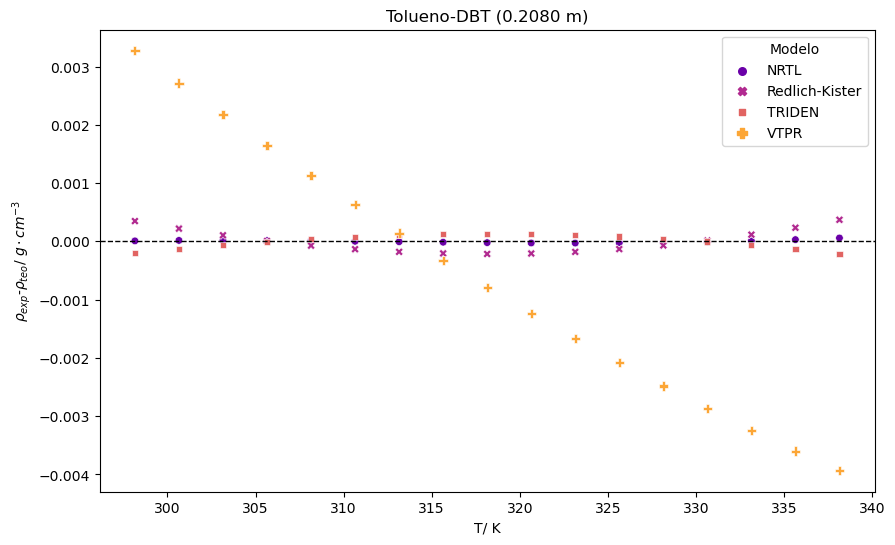

In [189]:
# Crear el scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=New_df,x="T", y='value', hue='variable', style="variable", palette='plasma', 
                size="variable",sizes=(45, 30), legend="full")

plt.axhline(y=0, color='black', linestyle='--', linewidth=1)

plt.legend(title='Modelo')
plt.title(TITULOS[7])
plt.xlabel("T/ K")
plt.ylabel(r"$\rho_{exp}$-$\rho_{teo}$/ $g\cdot cm^{-3}$")
plt.savefig(Guardar[7])
plt.savefig(Guardar[7])
# Mostrar el gráfico
plt.show()

In [190]:
New_df=pd.DataFrame()
New_df["NRTL"]=RES_DF.iloc[8:9,:].explode("RES_NRTL")["RES_NRTL"]
New_df["Redlich-Kister"]=RES_DF.iloc[8:9,:].explode("RES_RK")["RES_RK"]
New_df["TRIDEN"]=RES_DF.iloc[8:9,:].explode("RES_TR")["RES_TR"]
New_df["VTPR"]=RES_DF.iloc[8:9,:].explode("RES_VTPR")["RES_VTPR"]
New_df["T"]=Temps
New_df=New_df.reset_index(drop=True)
New_df=New_df.melt(id_vars='T')
#New_df.groupby('variable')['value'].agg(list).reset_index()
New_df

,T,variable,value
0,298.15,NRTL,0.000209
1,300.65,NRTL,0.000148
2,303.15,NRTL,0.000075
3,305.65,NRTL,0.000003
4,308.15,NRTL,-0.000045
...,...,...,...
63,328.15,VTPR,-0.0019
64,330.65,VTPR,-0.002337
65,333.15,VTPR,-0.00276
66,335.65,VTPR,-0.00317


In [191]:
New_df=pd.DataFrame()
New_df["NRTL"]=RES_DF.iloc[9:10,:].explode("RES_NRTL")["RES_NRTL"]
New_df["Redlich-Kister"]=RES_DF.iloc[9:10,:].explode("RES_RK")["RES_RK"]
New_df["TRIDEN"]=RES_DF.iloc[9:10,:].explode("RES_TR")["RES_TR"]
New_df["VTPR"]=RES_DF.iloc[9:10,:].explode("RES_VTPR")["RES_VTPR"]
New_df["T"]=Temps
New_df=New_df.reset_index(drop=True)
New_df=New_df.melt(id_vars='T')
#New_df.groupby('variable')['value'].agg(list).reset_index()
New_df

,T,variable,value
0,298.15,NRTL,0.000285
1,300.65,NRTL,0.000192
2,303.15,NRTL,0.000093
3,305.65,NRTL,0.000019
4,308.15,NRTL,-0.00006
...,...,...,...
63,328.15,VTPR,-0.001054
64,330.65,VTPR,-0.001132
65,333.15,VTPR,-0.001193
66,335.65,VTPR,-0.001237


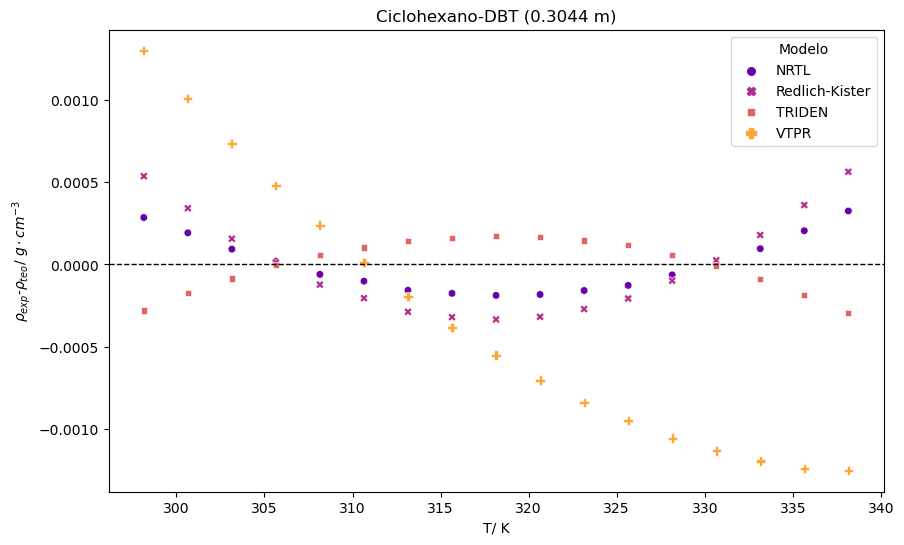

In [192]:
# Crear el scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=New_df,x="T", y='value', hue='variable', style="variable", palette='plasma', 
                size="variable",sizes=(45, 30), legend="full")

plt.axhline(y=0, color='black', linestyle='--', linewidth=1)

plt.legend(title='Modelo')
plt.title(TITULOS[9])
plt.xlabel("T/ K")
plt.ylabel(r"$\rho_{exp}$-$\rho_{teo}$/ $g\cdot cm^{-3}$")
plt.savefig(Guardar[9])
plt.savefig(Guardar[9])
# Mostrar el gráfico
plt.show()

In [193]:
New_df=pd.DataFrame()
New_df["NRTL"]=RES_DF.iloc[10:11,:].explode("RES_NRTL")["RES_NRTL"]
New_df["Redlich-Kister"]=RES_DF.iloc[10:11,:].explode("RES_RK")["RES_RK"]
New_df["TRIDEN"]=RES_DF.iloc[10:11,:].explode("RES_TR")["RES_TR"]
New_df["VTPR"]=RES_DF.iloc[10:11,:].explode("RES_VTPR")["RES_VTPR"]
New_df["T"]=Temps
New_df=New_df.reset_index(drop=True)
New_df=New_df.melt(id_vars='T')
#New_df.groupby('variable')['value'].agg(list).reset_index()
New_df

,T,variable,value
0,298.15,NRTL,-0.000006
1,300.65,NRTL,-0.00001
2,303.15,NRTL,-0.000012
3,305.65,NRTL,-0.000006
4,308.15,NRTL,-0.000009
...,...,...,...
63,328.15,VTPR,-0.002795
64,330.65,VTPR,-0.003183
65,333.15,VTPR,-0.003572
66,335.65,VTPR,-0.003943


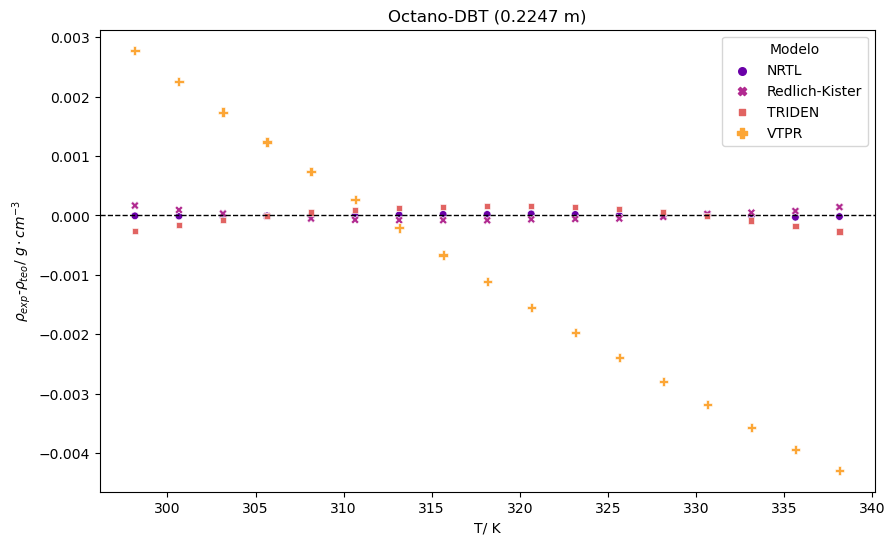

In [194]:
# Crear el scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=New_df,x="T", y='value', hue='variable', style="variable", palette='plasma', 
                size="variable",sizes=(45, 30), legend="full")

plt.axhline(y=0, color='black', linestyle='--', linewidth=1)

plt.legend(title='Modelo')
plt.title(TITULOS[10])
plt.xlabel("T/ K")
plt.ylabel(r"$\rho_{exp}$-$\rho_{teo}$/ $g\cdot cm^{-3}$")
plt.savefig(Guardar[10])
plt.savefig(Guardar[10])
# Mostrar el gráfico
plt.show()